#           Predicting The Severity Of An Accident

Note: I hardly recomment to read the report at the same time, on the report theres much more detail about what is happening

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Exploratory Data Analysis](#exploratory)
* [Model Development](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msg

With the obtained data, project aims to predict the severity of an accident, dependingon the features of it.  For example, the numbers of cars which are involved, speed, roadcondition, weather. . . etc

The main audience of this report could be any organization or government, obviouslythe ability to predict the consequence of an accident is something that generates a lot ofinterest.  The applications of this predictions could be used for example, for real-time ac-cident prediction, studying accident hot-spot locations, casualty analysis and extractingcause and effect rules to predict accidents, or studying the impact of precipitation or otherenvironmental stimuli on accident occurrence.



## Data <a name="data"></a>

All these data is obtained from Cornell University, specifically from Moosavi, Sobhan,Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath from “A Coun-trywide Traffic Accident Dataset.”, and “Accident Risk Prediction based on HeterogeneousSparse Data: New Dataset and Insights.”

In [3]:
df = pd.read_csv('US_Accidents_June20-1-1.csv')
df.shape


(175687, 49)

The obtained data contains information about traffic accidents, covering the 49 states of United States of America. This source has been continuously obtained since 2016, so we’re working with actual data. Currently, there 3.5 million rows (we will use  175k), each row contains information about a single accident. With all these data, we should be able to create a prediction model and discover some interesting information about this kind of events

### Data cleaning

If we want to make a good model, we have to delete all the unnecessary features, so, we will see which are the features 

In [4]:
df.corr()['Severity'].sort_values()

Traffic_Signal      -0.277551
Crossing            -0.195213
Stop                -0.096342
Start_Lng           -0.085889
Number              -0.073511
Station             -0.066251
Start_Lat           -0.055591
Amenity             -0.047348
Humidity(%)         -0.025909
Give_Way            -0.024363
Pressure(in)        -0.014988
No_Exit             -0.009798
Traffic_Calming     -0.008633
Bump                -0.007223
Roundabout          -0.006339
Wind_Speed(mph)     -0.004427
Visibility(mi)       0.000229
Railway              0.010263
Temperature(F)       0.029670
Distance(mi)         0.033782
Precipitation(in)    0.047695
Wind_Chill(F)        0.079608
Junction             0.104282
TMC                  0.132160
Severity             1.000000
End_Lat                   NaN
End_Lng                   NaN
Turning_Loop              NaN
Name: Severity, dtype: float64

As we see, there are some not relevant features in co-relation with severity, which is the one were trying to predict.

In [5]:
df.drop(['ID','Pressure(in)','Wind_Direction','Timezone','Country','Airport_Code','Astronomical_Twilight','Nautical_Twilight','State','Zipcode','Street','Side','City','County','Turning_Loop'],axis = 1,inplace = True)
df.drop(['Weather_Condition','Civil_Twilight'], axis = 1,inplace = True)

Now, we will delete the data with excesive amount of missing values

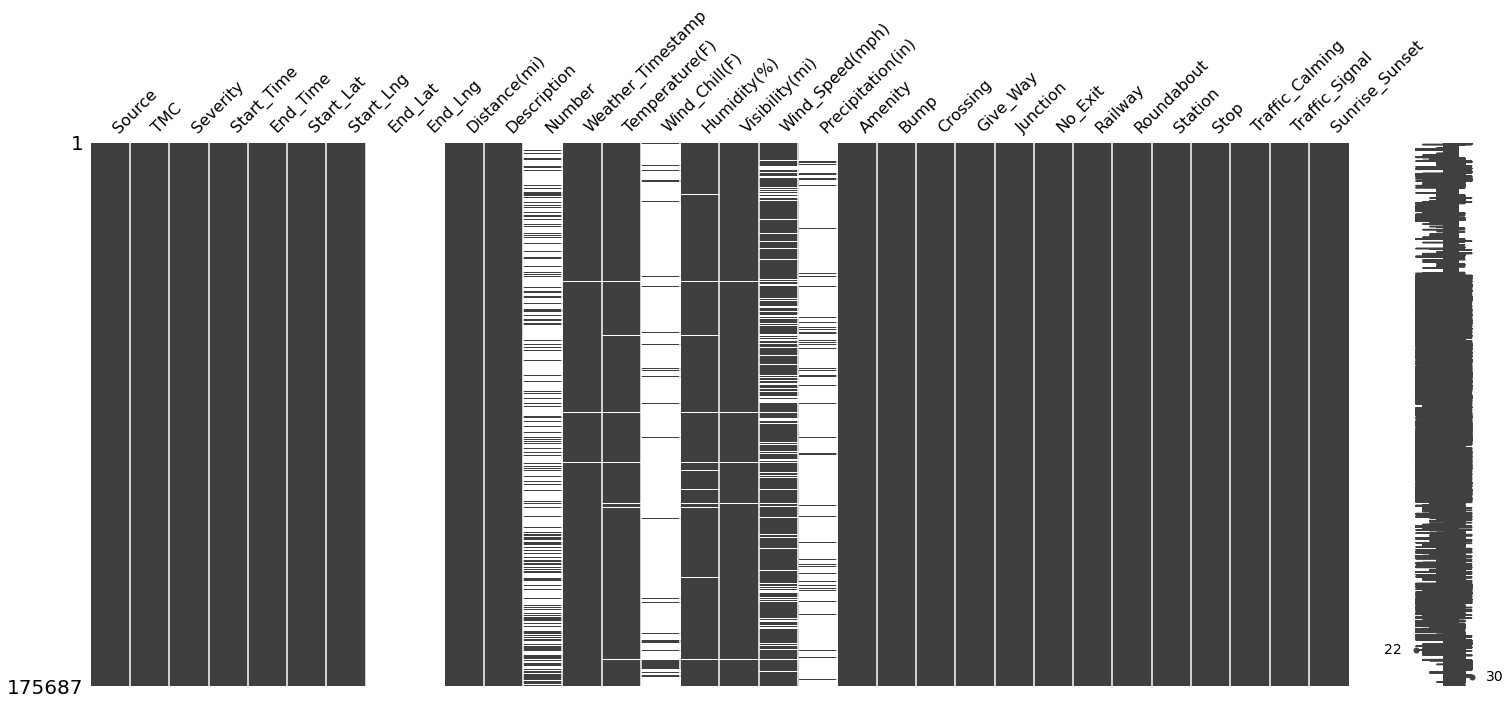

In [6]:
msg.matrix(df)

In [7]:
df.drop(['Start_Time','End_Time','Description','Weather_Timestamp','End_Lat','End_Lng','Wind_Chill(F)','Wind_Speed(mph)','Precipitation(in)','Number','Source'],axis = 1,inplace = True)


In [8]:
print('\nMissing values:',df.isnull().sum().sort_values(ascending = False))


Missing values: Humidity(%)        3157
Visibility(mi)     2842
Temperature(F)     2756
Sunrise_Sunset       14
Bump                  0
Severity              0
Start_Lat             0
Start_Lng             0
Distance(mi)          0
Amenity               0
Crossing              0
Traffic_Signal        0
Give_Way              0
Junction              0
No_Exit               0
Railway               0
Roundabout            0
Station               0
Stop                  0
Traffic_Calming       0
TMC                   0
dtype: int64


Now, we have clean all the unnecesary data, now it's time to fill the missing values and transforming categorical values to numerical ones

In [9]:
df = df.fillna(df['Visibility(mi)'].value_counts().index[0])
df = df.fillna(df['Temperature(F)'].value_counts().index[0])
df = 1*df

Now we will transform categorical values into numerical ones using hot encoding (See explanation on the documentation).

In [10]:
df = df.fillna(df['Sunrise_Sunset'].value_counts().index[0])
df = pd.concat([df,pd.get_dummies(df['Sunrise_Sunset'], prefix='Sunrise_Sunset',dummy_na=True)],axis=1).drop(['Sunrise_Sunset'],axis=1)

print('\nMissing values:',df.isnull().sum().sort_values(ascending = False))


As wee see, there are not missing values, so we can procced to exploratory data analysis


## Exploratory Data Analysis <a name="exploratory"></a>

Now, we have completed all the data cleaning,  we will visualize the data and take some information before making the formal prediction model.

#### Descriptive analysis

First, we will describe all the dataframe

In [11]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Visibility(mi),Amenity,Bump,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset_10.0,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Sunrise_Sunset_nan
count,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,...,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.000000,175687.0
mean,209.170052,2.416804,34.448807,-107.445599,0.030264,66.645731,62.162573,9.357902,0.008174,0.000165,...,0.009984,0.000057,0.027207,0.015875,0.000262,0.167850,0.000080,0.683306,0.316614,0.0
std,20.643348,0.496058,4.040410,16.771138,0.521301,16.002970,22.838198,1.865220,0.090038,0.012847,...,0.099419,0.007544,0.162688,0.124992,0.016179,0.373734,0.008926,0.465188,0.465157,0.0
min,200.000000,1.000000,25.433098,-123.813927,0.000000,-13.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,201.000000,2.000000,33.614765,-118.785316,0.000000,59.000000,47.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,201.000000,2.000000,34.039860,-117.857018,0.000000,68.000000,65.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,201.000000,3.000000,37.701521,-84.551865,0.010000,77.000000,80.000000,10.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,406.000000,4.000000,43.284466,-80.050438,80.890000,114.100000,100.000000,80.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [12]:
df.corr()['Severity'].sort_values()

Traffic_Signal         -0.277551
Crossing               -0.195213
Stop                   -0.096342
Start_Lng              -0.085889
Station                -0.066251
Start_Lat              -0.055591
Amenity                -0.047348
Sunrise_Sunset_Day     -0.033779
Humidity(%)            -0.027007
Give_Way               -0.024363
No_Exit                -0.009798
Traffic_Calming        -0.008633
Bump                   -0.007223
Roundabout             -0.006339
Sunrise_Sunset_10.0    -0.006215
Visibility(mi)          0.000530
Railway                 0.010263
Temperature(F)          0.019257
Distance(mi)            0.033782
Sunrise_Sunset_Night    0.033901
Junction                0.104282
TMC                     0.132160
Severity                1.000000
Sunrise_Sunset_nan           NaN
Name: Severity, dtype: float64

### CORRELATION AND CAUSATION

For some reason,a  new feature its created, so we will drop it.

In [13]:
df.drop('Sunrise_Sunset_nan',axis = 1,inplace = True)

Now, we will plot a correlation matrix, to know which features have the biggest impact on accident severity

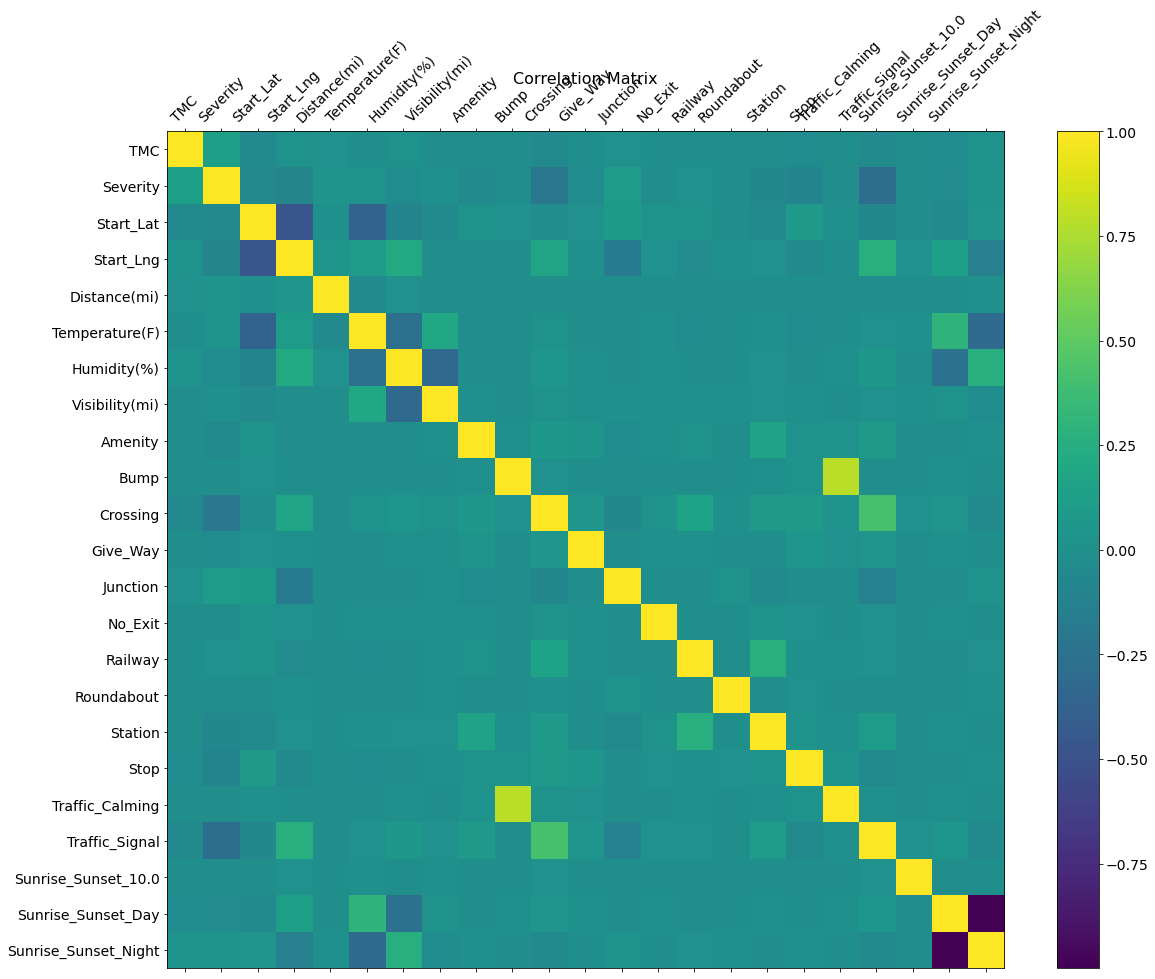

In [14]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

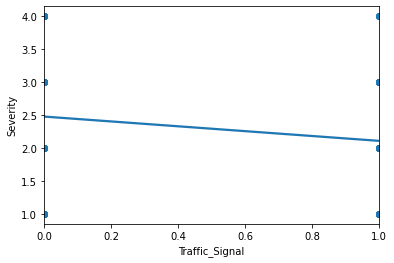

In [15]:
sns.regplot(x="Traffic_Signal", y="Severity", data=df)

#### Value Counts

In [35]:
df['Severity'].value_counts()

2    102291
3     73133
1       144
4       119
Name: Severity, dtype: int64

In [36]:
df['Crossing'].value_counts()

0    163228
1     12459
Name: Crossing, dtype: int64

## Model Development <a name="analysis"></a>

### K-Nearest neigbors

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.loc[:, df.columns != 'Severity'].values

In [ ]:
y = df['Severity']

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)


In [ ]:
k = 1
#Train Model and Predict  

neigh
plt.figure(figsize=(20, 5))
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)

neighy = neigh.predict(X_testset)
print("DecisionTrees's Accuracy: with ",21, metrics.accuracy_score(y_testset, neighy))
print("DecisionTrees's R2 Accuracy: with ",21, metrics.r2_score(y_testset, neighy))
print("DecisionTrees's F1 Accuracy: with ",21, metrics.f1_score(y_testset, neighy,average='weighted'))
ax1 = sns.distplot(df['Severity'], hist=False, color="r", label="Actual Value")
sns.distplot(neighy, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Predicted values for Severity using Decision Tree')
plt.xlabel('Severity')
plt.ylabel('Proportion ')

plt.show()
plt.close()

In [ ]:
yhat = neigh.predict(X_testset)

In [ ]:
from sklearn import metrics
print("DecisionTrees's Accuracy: with ",21, metrics.accuracy_score(y_testset, yhat))
print("DecisionTrees's R2 Accuracy: with ",21, metrics.r2_score(y_testset, yhat))
print("DecisionTrees's F1 Accuracy: with ",21, metrics.f1_score(y_testset, yhat,average='weighted'))

In [ ]:
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)
    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])

mean_acc

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Decission Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.loc[:, df.columns != 'Severity'].values

In [40]:
y = df['Severity']

In [41]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)


In [42]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 12)
drugTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [43]:
score = []
values = []
max = 0
n = 40
max2 = 0
for i in range (1,n):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    drugTree.fit(X_trainset,y_trainset)
    predTree = drugTree.predict(X_testset)
    if (max <metrics.accuracy_score(y_testset, predTree)):
        max = metrics.accuracy_score(y_testset, predTree)
        max2 = i
    score.append(metrics.accuracy_score(y_testset, predTree))
    values.append(i)

In [44]:
print(max)
print(max2)

0.9120230709393439
20


Text(0, 0.5, 'Score')

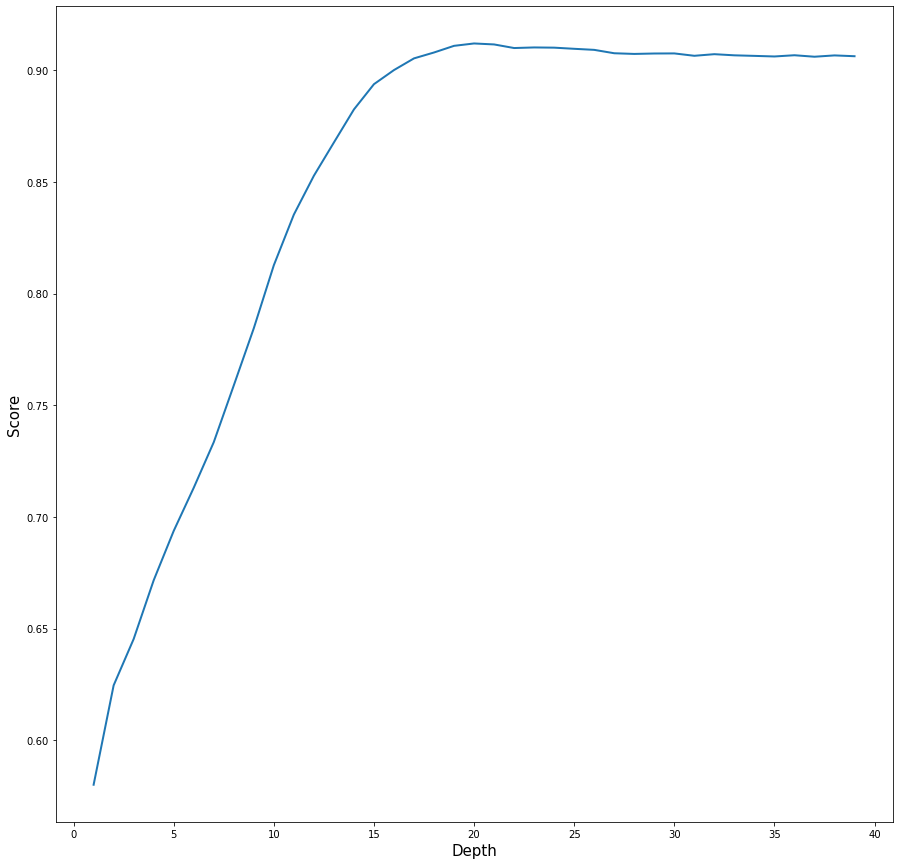

In [45]:
plt.figure(figsize=(15,15))
plt.plot(values,score, linewidth=2.0, label='fit')
plt.xlabel("Depth",fontsize = 15)
plt.ylabel("Score",fontsize = 15)

In [46]:
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score


In [47]:
df['Severity'].value_counts()

2    102291
3     73133
1       144
4       119
Name: Severity, dtype: int64

DecisionTrees's Accuracy: with  21 0.9110364847174
DecisionTrees's R2 Accuracy: with  21 0.6323274654868265
DecisionTrees's F1 Accuracy: with  21 0.9111440109786313


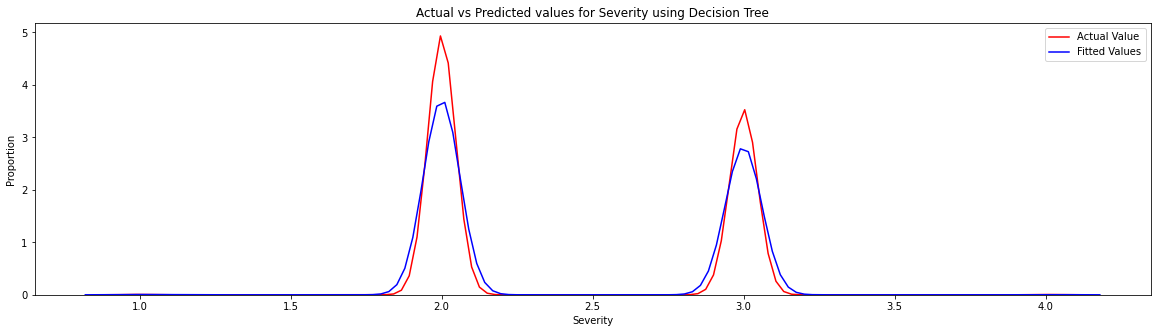

In [48]:
plt.figure(figsize=(20, 5))
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 21)
drugTree.fit(X_trainset,y_trainset)
predTree = drugTree.predict(X_testset)
print("DecisionTrees's Accuracy: with ",21, metrics.accuracy_score(y_testset, predTree))
print("DecisionTrees's R2 Accuracy: with ",21, metrics.r2_score(y_testset, predTree))
print("DecisionTrees's F1 Accuracy: with ",21, metrics.f1_score(y_testset, predTree,average='weighted'))
ax1 = sns.distplot(df['Severity'], hist=False, color="r", label="Actual Value")
sns.distplot(predTree, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Predicted values for Severity using Decision Tree')
plt.xlabel('Severity')
plt.ylabel('Proportion ')

plt.show()
plt.close()

### Support Vector Machine (Better dont run, hard to compute)

In [20]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (140549, 22) (140549,)
Test set: (35138, 22) (35138,)


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train) 

In [ ]:
yhat = clf.predict(X_test)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='saga',max_iter=1000).fit(X_train,y_train)
LR

LogisticRegression(C=0.01, max_iter=1000, solver='saga')

In [24]:
yhat = LR.predict(X_test)
yhat

array([2, 3, 2, ..., 2, 2, 2], dtype=int64)

In [30]:
from sklearn.metrics import log_loss
from sklearn import metrics
print("Logistic's Accuracy: with ",21, metrics.accuracy_score(y_test, yhat))
print("Logistic's R2 Accuracy: with ",21, metrics.r2_score(y_test, yhat))
print("Logistic's F1 Accuracy: with ",21, metrics.f1_score(y_test, yhat,average='weighted'))


Logistic's Accuracy: with  21 0.632249985770391
Logistic's R2 Accuracy: with  21 -0.49808937613709414
Logistic's F1 Accuracy: with  21 0.6166194076741273


DecisionTrees's Accuracy: with  21 0.632249985770391
DecisionTrees's R2 Accuracy: with  21 -0.49808937613709414
DecisionTrees's F1 Accuracy: with  21 0.6166194076741273


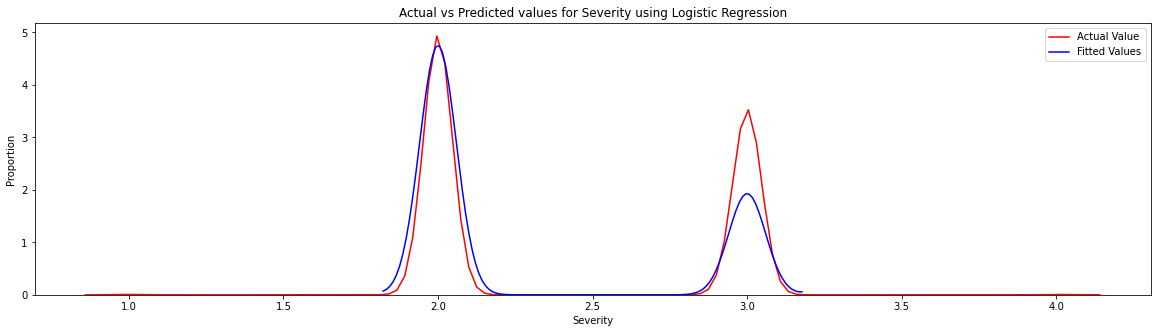

In [34]:
plt.figure(figsize=(20, 5))
print("DecisionTrees's Accuracy: with ",21, metrics.accuracy_score(y_test, yhat))
print("DecisionTrees's R2 Accuracy: with ",21, metrics.r2_score(y_test, yhat))
print("DecisionTrees's F1 Accuracy: with ",21, metrics.f1_score(y_test, yhat,average='weighted'))
ax1 = sns.distplot(df['Severity'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Predicted values for Severity using Logistic Regression')
plt.xlabel('Severity')
plt.ylabel('Proportion ')

plt.show()
plt.close()

## Result and discussion <a name="results"></a>

In this study, I analyzed the relationship between Accident severity and their main
characteristics. I identified weather, position, temperature, among the most important
features that affect on this kind of events. I built four different prediction models to try to
predict the level of severity of an accident, for example, Logistic Regression or k-Nearest
Neighbors. These models can be very useful in helping goverments and organizations, ffor
instance, it could help identify and help to determine the safety of a road in case of accident.

## Conclusion <a name="conclusion"></a>

Thanks for reading all the notebook, hope you will like it!